In [1]:
# conda install jupyter
# pip install matplotlib pandas scikit-learn scipy


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'hours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                   'score': [60, 63, 64, 67, 68, 71, 72, 75, 76, 78]})

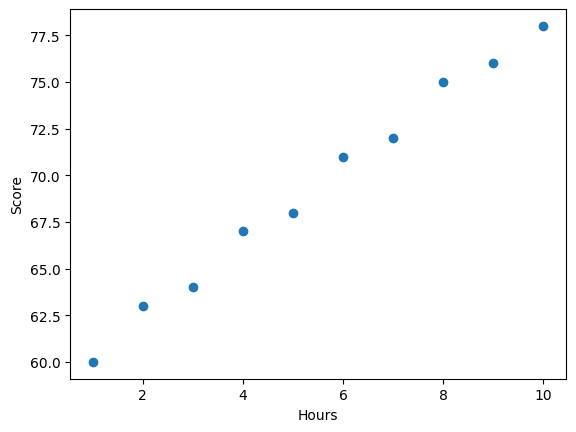

In [4]:
plt.scatter(df.hours, df.score)  # 점도표
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [5]:
# 학습 데이터 X와 라벨데이터 y 로 데이터 분할
X = df[['hours']]
y = df[['score']]

In [11]:
# 데이터를 numpy 포맷으로 변환
X = X.to_numpy ()
y = y.to_numpy ()

In [12]:
# 선형회기 머신러닝 기법 적용
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()     # scikit learn LinearRegression 개체 생성
regressor.fit(X, y)    # fit 메서드를 사용해 모델 트레이닝 실행

LinearRegression()

In [13]:
# 테스트 데이터 생성
test_df = pd.DataFrame({'hours': [12]})  # 학습 데이터에 없던 값
test_df

,hours
0,12


In [14]:
X_test = test_df.to_numpy ()
y_pred = regressor.predict(X_test)
y_pred

array([[82.24242424]])

In [15]:
# 정확도 체크
from sklearn.model_selection import train_test_split

# 데이터를 트레이닝 데이터셋과 테스트 데이터셋으로 분리 
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, 
                                                    y, 
                                                    test_size=0.3,    # 7:3의 비율로 분리
                                                    random_state=42
                                                   )


In [16]:
X_train
# 7건의 트레이닝 데이터

array([[ 1],
       [ 8],
       [ 3],
       [10],
       [ 5],
       [ 4],
       [ 7]])

In [17]:
y_train

array([[60],
       [75],
       [64],
       [78],
       [68],
       [67],
       [72]])

In [18]:
X_test
# 3건의 테스트 데이터

array([[9],
       [2],
       [6]])

In [19]:
y_test

array([[76],
       [63],
       [71]])

In [20]:
regressor = LinearRegression()     # scikit learn LinearRegression 개체 생성
regressor.fit(X_train, y_train)    # fit 메서드를 사용해 모델 트레이닝 실행

y_pred = regressor.predict(X_test)

In [21]:
y_pred

array([[76.35643564],
       [62.21782178],
       [70.2970297 ]])

In [22]:
X_test

array([[9],
       [2],
       [6]])

In [23]:
# https://www.sqler.com/board_MachineLearning_AI_tip_lecture/1096470
from sklearn import metrics

# MSE - 에러율
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 0.41100545698134594


In [24]:
print('Mean absolute error: ',metrics.mean_absolute_error(y_test, y_pred))

Mean absolute error:  0.6138613861386162


In [27]:
import joblib

In [30]:
# 모델 저장
joblib.dump(regressor, 'model.pkl')

['model.pkl']

In [31]:
# 모델을 로드하고 예측 실행
loaded_model = joblib.load('model.pkl')

In [34]:
X_test = pd.DataFrame({'hours': [14]}).to_numpy ()  # 14를 df에서 np로 변환하고 predict 수행
y_pred = loaded_model.predict(X_test)
y_pred

array([[86.45544554]])